# Data Preprocesssing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv("../data/input_data.csv")

In [3]:
raw_data.head()

,MONTH,DAY_OF_MONTH,FL_DATE,MKT_CARRIER,OP_CARRIER,ORIGIN,DEST,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,...,Scheduled_ARR_EST,Actual_ARR_dt_EST,Scheduled_ARR_Local,Actual_ARR_dt_Local,late_airjet_when_turnaround_within_180,affected_turnaround_lessthan120,affected_turnaround_lessthan90,affected_turnaround_lessthan60,affected_turnaround_lessthan45,day_of_week
0,1,2,2023-01-02,G4,G4,MSP,SRQ,-5,0.0,0.0,...,01/02/2023 14:47:00,01/02/2023 14:33:00,01/02/2023 14:47:00,01/02/2023 14:33:00,0,1,1,1,1,Monday
1,1,2,2023-01-02,G4,G4,IAD,SRQ,247,247.0,1.0,...,01/02/2023 23:43:00,01/03/2023 3:35:00,01/02/2023 23:43:00,01/03/2023 3:35:00,1,1,1,1,1,Monday
2,1,3,2023-01-03,G4,G4,BOS,SRQ,-13,0.0,0.0,...,01/03/2023 15:27:00,01/03/2023 15:15:00,01/03/2023 15:27:00,01/03/2023 15:15:00,0,1,1,1,1,Tuesday
3,1,5,2023-01-05,G4,G4,MSP,SRQ,-24,0.0,0.0,...,01/05/2023 16:47:00,01/05/2023 16:15:00,01/05/2023 16:47:00,01/05/2023 16:15:00,0,1,1,1,1,Thursday
4,1,9,2023-01-09,G4,G4,BOS,SRQ,-2,0.0,0.0,...,01/09/2023 15:22:00,01/09/2023 15:06:00,01/09/2023 15:22:00,01/09/2023 15:06:00,0,1,1,1,1,Monday


In [4]:
raw_data.shape

(5559465, 56)

In [5]:
raw_data.columns

Index(['MONTH', 'DAY_OF_MONTH', 'FL_DATE', 'MKT_CARRIER', 'OP_CARRIER',
       'ORIGIN', 'DEST', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15',
       'ARR_DELAY', 'ARR_DELAY_NEW', 'ARR_DEL15', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'CRS_DEP_1hrpre', 'CRS_DEP_1hrpost', 'DEP_1hrpre_num',
       'DEP_1hrpost_num', 'Arr_1hrpre_num', 'Arr_1hrpost_num', 'max_temp_f',
       'min_temp_f', 'max_dewpoint_f', 'min_dewpoint_f', 'precip_in',
       'avg_wind_speed_kts', 'snow_in', 'avg_feel', 'FAA_class',
       'scheduled_Turnarnd', 'Actual_Turnarnd', 'Diff_in_turnarnd',
       'longTurnaround', 'Scheduled_DEP', 'Scheduled_ARR_Ori',
       'Actual_ARR_dt_Ori', 'Scheduled_DEP_EST', 'Actual_DEP_dt_EST',
       'Scheduled_ARR_EST', 'Actual_ARR_dt_EST', 'Scheduled_ARR_Local',
       'Actual_ARR_dt_Local', 'late_airjet_when_turnaround_within_180',
       'affected_turna

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5559465 entries, 0 to 5559464
Data columns (total 56 columns):
 #   Column                                  Dtype  
---  ------                                  -----  
 0   MONTH                                   int64  
 1   DAY_OF_MONTH                            int64  
 2   FL_DATE                                 object 
 3   MKT_CARRIER                             object 
 4   OP_CARRIER                              object 
 5   ORIGIN                                  object 
 6   DEST                                    object 
 7   DEP_DELAY                               int64  
 8   DEP_DELAY_NEW                           float64
 9   DEP_DEL15                               float64
 10  ARR_DELAY                               float64
 11  ARR_DELAY_NEW                           float64
 12  ARR_DEL15                               float64
 13  CRS_ELAPSED_TIME                        float64
 14  ACTUAL_ELAPSED_TIME               

In [7]:
raw_data.describe()

,MONTH,DAY_OF_MONTH,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,...,avg_feel,scheduled_Turnarnd,Actual_Turnarnd,Diff_in_turnarnd,longTurnaround,late_airjet_when_turnaround_within_180,affected_turnaround_lessthan120,affected_turnaround_lessthan90,affected_turnaround_lessthan60,affected_turnaround_lessthan45
count,5.559465e+06,5.559465e+06,5.559465e+06,5.462439e+06,5.462439e+06,5.445526e+06,5.445526e+06,5.445526e+06,5.559463e+06,5.445526e+06,...,5.559465e+06,4.202595e+06,4.159334e+06,4.104981e+06,5.559465e+06,5.559465e+06,5.559465e+06,5.559465e+06,5.559465e+06,5.559465e+06
mean,6.079877e+00,1.573415e+01,1.278428e+01,1.588023e+01,2.148368e-01,7.448735e+00,1.571234e+01,2.149640e-01,1.488146e+02,1.435483e+02,...,6.320779e+01,8.205684e+01,9.130113e+01,9.519265e+00,5.950438e-01,1.314326e-01,8.556915e-01,8.447561e-01,7.998018e-01,7.423419e-01
std,3.132073e+00,8.772866e+00,5.400464e+01,5.350250e+01,4.107091e-01,5.626025e+01,5.305210e+01,4.107974e-01,7.445611e+01,7.444299e+01,...,1.880895e+01,9.331170e+01,1.013974e+02,4.427600e+01,4.908836e-01,3.378729e-01,3.514023e-01,3.621371e-01,4.001486e-01,4.373447e-01
min,1.000000e+00,1.000000e+00,-7.200000e+01,0.000000e+00,0.000000e+00,-1.190000e+02,0.000000e+00,0.000000e+00,-5.000000e+00,2.300000e+01,...,-1.917894e+01,0.000000e+00,1.000000e+00,-1.016000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,8.000000e+00,-5.000000e+00,0.000000e+00,0.000000e+00,-1.400000e+01,0.000000e+00,0.000000e+00,9.300000e+01,8.800000e+01,...,5.206675e+01,4.900000e+01,5.300000e+01,-2.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
50%,6.000000e+00,1.600000e+01,-1.000000e+00,0.000000e+00,0.000000e+00,-5.000000e+00,0.000000e+00,0.000000e+00,1.310000e+02,1.270000e+02,...,6.586607e+01,6.000000e+01,6.700000e+01,7.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
75%,9.000000e+00,2.300000e+01,1.000000e+01,1.000000e+01,0.000000e+00,1.000000e+01,1.000000e+01,0.000000e+00,1.800000e+02,1.750000e+02,...,7.622916e+01,7.500000e+01,8.800000e+01,1.700000e+01,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
max,1.100000e+01,3.100000e+01,5.764000e+03,5.764000e+03,1.000000e+00,5.780000e+03,5.780000e+03,1.000000e+00,1.425000e+03,7.950000e+02,...,1.051889e+02,1.229000e+03,4.435000e+03,4.226000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


## here we have some post event variables and delay cause attributes, we will include only those necessary for prediction

In [8]:
TARGET = "DEP_DEL15"

leakage_cols = [
    "DEP_DELAY", "DEP_DELAY_NEW", "DEP_DEL15",
    "ARR_DELAY", "ARR_DELAY_NEW", "ARR_DEL15",
    "CARRIER_DELAY", "WEATHER_DELAY", "NAS_DELAY",
    "SECURITY_DELAY", "LATE_AIRCRAFT_DELAY",
    "ACTUAL_ELAPSED_TIME", "AIR_TIME",
    "Actual_Turnarnd", "Diff_in_turnarnd", "longTurnaround",
    "Actual_ARR_dt_Ori", "Actual_DEP_dt_EST",
    "Actual_ARR_dt_EST", "Actual_ARR_dt_Local"
]

X = raw_data.drop(columns=leakage_cols)
y = raw_data[TARGET]


In [9]:
X.columns

Index(['MONTH', 'DAY_OF_MONTH', 'FL_DATE', 'MKT_CARRIER', 'OP_CARRIER',
       'ORIGIN', 'DEST', 'CRS_ELAPSED_TIME', 'DISTANCE', 'CRS_DEP_1hrpre',
       'CRS_DEP_1hrpost', 'DEP_1hrpre_num', 'DEP_1hrpost_num',
       'Arr_1hrpre_num', 'Arr_1hrpost_num', 'max_temp_f', 'min_temp_f',
       'max_dewpoint_f', 'min_dewpoint_f', 'precip_in', 'avg_wind_speed_kts',
       'snow_in', 'avg_feel', 'FAA_class', 'scheduled_Turnarnd',
       'Scheduled_DEP', 'Scheduled_ARR_Ori', 'Scheduled_DEP_EST',
       'Scheduled_ARR_EST', 'Scheduled_ARR_Local',
       'late_airjet_when_turnaround_within_180',
       'affected_turnaround_lessthan120', 'affected_turnaround_lessthan90',
       'affected_turnaround_lessthan60', 'affected_turnaround_lessthan45',
       'day_of_week'],
      dtype='object')

## Now we clean for missing values

In [10]:
X.isnull().sum()

MONTH                                           0
DAY_OF_MONTH                                    0
FL_DATE                                         0
MKT_CARRIER                                     0
OP_CARRIER                                      0
ORIGIN                                          0
DEST                                            0
CRS_ELAPSED_TIME                                2
DISTANCE                                        0
CRS_DEP_1hrpre                                  0
CRS_DEP_1hrpost                                 0
DEP_1hrpre_num                                  0
DEP_1hrpost_num                                 0
Arr_1hrpre_num                                  0
Arr_1hrpost_num                                 0
max_temp_f                                      0
min_temp_f                                      0
max_dewpoint_f                                  0
min_dewpoint_f                                  0
precip_in                                       0


In [11]:
X[X['CRS_ELAPSED_TIME'].isnull()].head()


,MONTH,DAY_OF_MONTH,FL_DATE,MKT_CARRIER,OP_CARRIER,ORIGIN,DEST,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_1hrpre,...,Scheduled_ARR_Ori,Scheduled_DEP_EST,Scheduled_ARR_EST,Scheduled_ARR_Local,late_airjet_when_turnaround_within_180,affected_turnaround_lessthan120,affected_turnaround_lessthan90,affected_turnaround_lessthan60,affected_turnaround_lessthan45,day_of_week
1921390,1,5,2023-01-05,AS,OO,SFO,PSP,NaN,421,05JAN23:10:00:00,...,. .,01/05/2023 14:30:00,. .,. .,0,0,0,0,0,Thursday
5317246,2,24,2023-02-24,NK,NK,LAS,RNO,NaN,345,24FEB23:06:00:00,...,. .,02/24/2023 10:25:00,. .,. .,0,0,0,0,0,Friday


### dropping missing CRS_ELASPED_TIME values

In [12]:
X = X.dropna(subset=['CRS_ELAPSED_TIME'])
y = y.loc[X.index]

## Creating a new Flag colum for schedules_Turnaround to indicate wheather Turnaround time exist for that

In [13]:
X["has_turnaround"] = X["scheduled_Turnarnd"].notna().astype(int)
X["scheduled_Turnarnd"] = X["scheduled_Turnarnd"].fillna(0)

In [14]:
X.isnull().sum()

MONTH                                     0
DAY_OF_MONTH                              0
FL_DATE                                   0
MKT_CARRIER                               0
OP_CARRIER                                0
ORIGIN                                    0
DEST                                      0
CRS_ELAPSED_TIME                          0
DISTANCE                                  0
CRS_DEP_1hrpre                            0
CRS_DEP_1hrpost                           0
DEP_1hrpre_num                            0
DEP_1hrpost_num                           0
Arr_1hrpre_num                            0
Arr_1hrpost_num                           0
max_temp_f                                0
min_temp_f                                0
max_dewpoint_f                            0
min_dewpoint_f                            0
precip_in                                 0
avg_wind_speed_kts                        0
snow_in                                   0
avg_feel                        

In [15]:
X_clean = X.copy()
y_clean = y.copy()

In [16]:
X_clean.head()

,MONTH,DAY_OF_MONTH,FL_DATE,MKT_CARRIER,OP_CARRIER,ORIGIN,DEST,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_1hrpre,...,Scheduled_DEP_EST,Scheduled_ARR_EST,Scheduled_ARR_Local,late_airjet_when_turnaround_within_180,affected_turnaround_lessthan120,affected_turnaround_lessthan90,affected_turnaround_lessthan60,affected_turnaround_lessthan45,day_of_week,has_turnaround
0,1,2,2023-01-02,G4,G4,MSP,SRQ,204.0,1342,02JAN23:09:00:00,...,01/02/2023 11:23:00,01/02/2023 14:47:00,01/02/2023 14:47:00,0,1,1,1,1,Monday,1
1,1,2,2023-01-02,G4,G4,IAD,SRQ,152.0,849,02JAN23:20:00:00,...,01/02/2023 21:11:00,01/02/2023 23:43:00,01/02/2023 23:43:00,1,1,1,1,1,Monday,1
2,1,3,2023-01-03,G4,G4,BOS,SRQ,204.0,1220,03JAN23:11:00:00,...,01/03/2023 12:03:00,01/03/2023 15:27:00,01/03/2023 15:27:00,0,1,1,1,1,Tuesday,1
3,1,5,2023-01-05,G4,G4,MSP,SRQ,204.0,1342,05JAN23:11:00:00,...,01/05/2023 13:23:00,01/05/2023 16:47:00,01/05/2023 16:47:00,0,1,1,1,1,Thursday,1
4,1,9,2023-01-09,G4,G4,BOS,SRQ,219.0,1220,09JAN23:10:00:00,...,01/09/2023 11:43:00,01/09/2023 15:22:00,01/09/2023 15:22:00,0,1,1,1,1,Monday,1


In [17]:
y_clean.head()

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: DEP_DEL15, dtype: float64

In [18]:
y_clean.mean()

np.float64(0.2148368548988565)

In [19]:
pd.crosstab(X_clean["day_of_week"], y_clean, normalize="index")


DEP_DEL15,0.0,1.0
day_of_week,,
Friday,0.764880,0.235120
Monday,0.784887,0.215113
Saturday,0.786688,0.213312
Sunday,0.762464,0.237536
Thursday,0.779370,0.220630
Tuesday,0.816660,0.183340
Wednesday,0.802724,0.197276


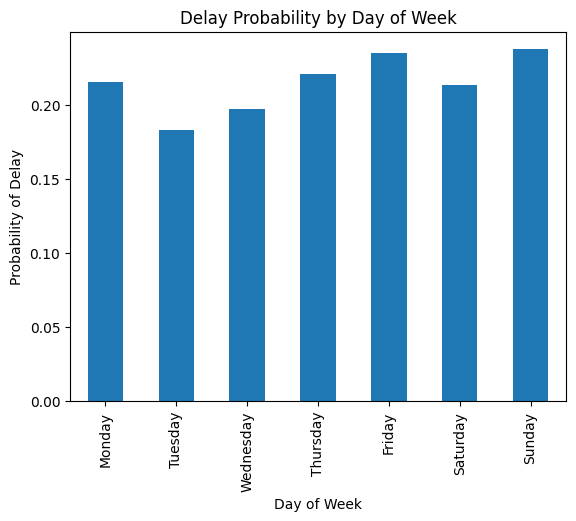

In [20]:
df_plot = pd.concat([X_clean, y_clean.rename("delay")], axis=1)
day_delay = (
    df_plot.groupby("day_of_week")["delay"]
    .mean()
    .reindex(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
)
plt.figure()
day_delay.plot(kind="bar")
plt.xlabel("Day of Week")
plt.ylabel("Probability of Delay")
plt.title("Delay Probability by Day of Week")
plt.show()

##### EDA indicates that flights scheduled on Fridays and Sundays exhibit a slightly higher probability of delay, likely due to increased passenger demand and operational congestion. In contrast, Tuesdays and Wednesdays show lower delay rates, consistent with reduced traffic and greater scheduling buffers.

In [21]:
X_clean.assign(delay=y_clean) \
       .groupby(pd.cut(X_clean["precip_in"], bins=3))["delay"] \
       .mean()



C:\Users\rishi\AppData\Local\Temp\ipykernel_13756\31969688.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(pd.cut(X_clean["precip_in"], bins=3))["delay"] \


precip_in
(-0.0225, 7.5]    0.214817
(7.5, 15.0]       0.420677
(15.0, 22.5]      0.181159
Name: delay, dtype: float64

##### EDA showed that moderate precipitation levels were associated with the highest delay probability, likely due to operational congestion, while extreme precipitation periods showed lower delay rates, potentially due to flight cancellations and schedule reductions.

## Handling Categorical Features

### One Hot encoding for low Cardinality Features

In [22]:
low_card_cols = [
    "day_of_week",
    "FAA_class",
    "MKT_CARRIER",
    "OP_CARRIER"
]

X_encoded = pd.get_dummies(
    X_clean,
    columns=low_card_cols,
    drop_first=True
)


In [23]:
X_encoded.columns

Index(['MONTH', 'DAY_OF_MONTH', 'FL_DATE', 'ORIGIN', 'DEST',
       'CRS_ELAPSED_TIME', 'DISTANCE', 'CRS_DEP_1hrpre', 'CRS_DEP_1hrpost',
       'DEP_1hrpre_num', 'DEP_1hrpost_num', 'Arr_1hrpre_num',
       'Arr_1hrpost_num', 'max_temp_f', 'min_temp_f', 'max_dewpoint_f',
       'min_dewpoint_f', 'precip_in', 'avg_wind_speed_kts', 'snow_in',
       'avg_feel', 'scheduled_Turnarnd', 'Scheduled_DEP', 'Scheduled_ARR_Ori',
       'Scheduled_DEP_EST', 'Scheduled_ARR_EST', 'Scheduled_ARR_Local',
       'late_airjet_when_turnaround_within_180',
       'affected_turnaround_lessthan120', 'affected_turnaround_lessthan90',
       'affected_turnaround_lessthan60', 'affected_turnaround_lessthan45',
       'has_turnaround', 'day_of_week_Monday', 'day_of_week_Saturday',
       'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday',
       'day_of_week_Wednesday', 'FAA_class_Med', 'MKT_CARRIER_AS',
       'MKT_CARRIER_B6', 'MKT_CARRIER_DL', 'MKT_CARRIER_F9', 'MKT_CARRIER_G4',
       'MKT_CA

### Frequency encoding for high Cardinality Features

In [24]:
for col in ["ORIGIN", "DEST"]:
    freq = X_encoded[col].value_counts(normalize=True)
    X_encoded[col + "_freq"] = X_encoded[col].map(freq)

X_encoded = X_encoded.drop(columns=["ORIGIN", "DEST"])


In [25]:
X_encoded[['ORIGIN_freq','DEST_freq']].tail()

,ORIGIN_freq,DEST_freq
5559460,0.003797,0.000191
5559461,0.004015,0.000191
5559462,0.016087,0.000191
5559463,0.007610,0.000191
5559464,0.004015,0.000192


In [26]:
X_encoded.isnull().sum().sum()


np.int64(0)

In [27]:
X_encoded.dtypes.value_counts()


bool       36
int64      15
float64    10
object      8
Name: count, dtype: int64

In [28]:
X_encoded.select_dtypes(include="object").columns


Index(['FL_DATE', 'CRS_DEP_1hrpre', 'CRS_DEP_1hrpost', 'Scheduled_DEP',
       'Scheduled_ARR_Ori', 'Scheduled_DEP_EST', 'Scheduled_ARR_EST',
       'Scheduled_ARR_Local'],
      dtype='object')

## 🕒 Handling Datetime (Object-Type) Features

After categorical encoding, several columns remained with `object` data types. These columns represented **date and time information stored as strings**, which cannot be used directly by machine learning models.

The following datetime-related columns were identified:
- `FL_DATE`
- `CRS_DEP_1hrpre`, `CRS_DEP_1hrpost`
- `Scheduled_DEP`
- `Scheduled_ARR_Ori`, `Scheduled_DEP_EST`, `Scheduled_ARR_EST`, `Scheduled_ARR_Local`

### Approach Taken
- Raw date and timestamp columns were **not used directly**, as they do not provide meaningful numerical representations for models.
- Relevant temporal information was **extracted from the scheduled departure timestamp**, such as the **hour of departure** and a **rush-hour indicator**, which are more informative for predicting delays.
- All remaining raw datetime columns were then **dropped** to eliminate redundancy, since their effects were already captured through derived features or existing congestion-related variables.

After this transformation, all features in the dataset were numeric, and no `object`-type columns remained, making the data fully model-ready.


In [29]:
X_encoded["Scheduled_DEP"] = pd.to_datetime(X_encoded["Scheduled_DEP"])
X_encoded["dep_hour"] = X_encoded["Scheduled_DEP"].dt.hour
X_encoded["is_rush_hour"] = X_encoded["dep_hour"].isin([7,8,9,17,18,19]).astype(int)
X_encoded = X_encoded.drop(columns=["Scheduled_DEP"])


In [30]:
X_encoded = X_encoded.drop(columns=[
    "FL_DATE",
    "CRS_DEP_1hrpre",
    "CRS_DEP_1hrpost",
    "Scheduled_ARR_Ori",
    "Scheduled_DEP_EST",
    "Scheduled_ARR_EST",
    "Scheduled_ARR_Local"
])


In [31]:
X_encoded.dtypes.value_counts()


bool       36
int64      16
float64    10
int32       1
Name: count, dtype: int64

In [32]:
X_encoded[['dep_hour','is_rush_hour']].tail()

,dep_hour,is_rush_hour
5559460,18,1
5559461,8,1
5559462,16,0
5559463,20,0
5559464,7,1


## Handling Wheather Features

### Rain

In [33]:
X_encoded["rain_flag"] = (X_encoded["precip_in"] > 0).astype(int)
pd.crosstab(X_encoded["rain_flag"], y_clean, normalize="index")


DEP_DEL15,0.0,1.0
rain_flag,,
0,0.808990,0.191010
1,0.747164,0.252836


### Wind

In [34]:
X_encoded["high_wind_flag"] = (X_encoded["avg_wind_speed_kts"] >= 15).astype(int)
pd.crosstab(X_encoded["high_wind_flag"], y_clean, normalize="index")


DEP_DEL15,0.0,1.0
high_wind_flag,,
0,0.785802,0.214198
1,0.746770,0.253230


### Snow

In [35]:
X_encoded["snow_flag"] = (X_encoded["snow_in"] > 0).astype(int)
pd.crosstab(X_encoded["snow_flag"], y_clean, normalize="index")

DEP_DEL15,0.0,1.0
snow_flag,,
0,0.786868,0.213132
1,0.740034,0.259966


### Temperature

In [36]:
X_encoded["temp_range"] = X_encoded["max_temp_f"] - X_encoded["min_temp_f"]


### Weather Feature Evaluation

Binary indicators were created for precipitation, high wind, and snow to capture operationally meaningful weather conditions. Exploratory analysis showed a consistent increase in delay probability under adverse weather conditions. Flights operating during rainfall exhibited approximately a 6% higher delay rate, while high wind and snow conditions were associated with delay increases of around 4–5%. Based on these results, the derived weather flags were retained as predictive features alongside the original continuous weather variables.


## Test - Train Splitting

In [37]:
X_encoded.columns

Index(['MONTH', 'DAY_OF_MONTH', 'CRS_ELAPSED_TIME', 'DISTANCE',
       'DEP_1hrpre_num', 'DEP_1hrpost_num', 'Arr_1hrpre_num',
       'Arr_1hrpost_num', 'max_temp_f', 'min_temp_f', 'max_dewpoint_f',
       'min_dewpoint_f', 'precip_in', 'avg_wind_speed_kts', 'snow_in',
       'avg_feel', 'scheduled_Turnarnd',
       'late_airjet_when_turnaround_within_180',
       'affected_turnaround_lessthan120', 'affected_turnaround_lessthan90',
       'affected_turnaround_lessthan60', 'affected_turnaround_lessthan45',
       'has_turnaround', 'day_of_week_Monday', 'day_of_week_Saturday',
       'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday',
       'day_of_week_Wednesday', 'FAA_class_Med', 'MKT_CARRIER_AS',
       'MKT_CARRIER_B6', 'MKT_CARRIER_DL', 'MKT_CARRIER_F9', 'MKT_CARRIER_G4',
       'MKT_CARRIER_HA', 'MKT_CARRIER_NK', 'MKT_CARRIER_UA', 'MKT_CARRIER_WN',
       'OP_CARRIER_AA', 'OP_CARRIER_AS', 'OP_CARRIER_B6', 'OP_CARRIER_C5',
       'OP_CARRIER_DL', 'OP_CARRIER_F9', 'O

### Restore FL_DATE only for splitting reference (NOT as a feature)

In [42]:
flight_dates = raw_data.loc[X_encoded.index, ["FL_DATE"]].copy()
flight_dates["FL_DATE"] = pd.to_datetime(flight_dates["FL_DATE"])
# Rename for clarity
X_final = X_encoded.copy()
y_final = y.copy()

# Save processed datasets
X_final.to_csv("../data/processed/X_features.csv", index=False)
y_final.to_csv("../data/processed/y_target.csv", index=False)
flight_dates.to_csv("../data/processed/flight_dates.csv", index=False)




In [49]:
flight_dates.shape


(5559463, 1)

In [51]:
y_final.size

5559463

In [52]:
X_final.shape

(5559463, 67)

## ✅ Preprocessing Summary & Notebook Conclusion

This notebook focused on transforming raw flight and weather data into a clean, leakage-safe, and model-ready dataset suitable for predictive modeling.

Key steps completed include:
- Identification and removal of post-event and outcome-related variables to prevent data leakage.
- Careful handling of missing values, including explicit treatment of structurally missing turnaround-related information.
- Encoding of categorical variables using appropriate strategies for low- and high-cardinality features.
- Transformation of datetime fields into meaningful temporal features while removing raw timestamps.
- Evidence-based evaluation and inclusion of weather-related features that show a consistent relationship with flight delays.
- Validation that the final feature matrix contains only numeric values and no missing data.

The final processed feature matrix, target variable, and corresponding flight dates have been saved for downstream time-based train/test splitting and model development.  
Subsequent notebooks will focus on model training, evaluation, and interpretation using this prepared dataset.
